# 大学の専攻に基づいた収益に関する視覚的調査

2010年から2012年の間に大学を卒業した学生の仕事の結果に関するデータセットを使用します。仕事の結果に関する元のデータは、調査を実施してデータを集計するAmerican CommunitySurveyによってリリースされました。

データセットの各行は、大学のさまざまな専攻を表しており、性別の多様性、雇用率、給与の中央値などに関する情報が含まれています。データセットの列の一部を次に示します。

- Rank - 収入の中央値でランク付けします（データセットはこの列の順に並べられています）
- Major_code - メジャー（専攻）コード
- Major - メジャーの説明
- Major_category - メジャーの説明
- Total - メジャーを持つ人の総数
- Sample_size - フルタイムのサンプルサイズ（重み付けなし）
- Men - 男性の卒業生
- Women - 女性の卒業生
- ShareWomen - 全体のシェアとしての女性
- Employed - 雇用数
- Median - フルタイムの通年労働者の給与の中央値
- Low_wage_jobs - 低賃金のサービス関連仕事の数
- Full_time - 35時間以上雇用された数
- Part_time - 35時間未満の雇用数

- Full_time_year_round - 少なくとも50週間および少なくとも35時間/週雇用された
- Unemployed - 失業者数
- Unemployment_rate - 失業者/（失業者+雇用数）
- P25th - 収益の25パーセンタイル
- P75th - 収益の75パーセンタイル
- College_jobs - 大学の学位を必要とする仕事の数
- Non_college_jobs - 大学の学位を必要としない仕事の数

# 焦点

- より人気のある専攻の学生はより多くのお金を稼ぐのか？
  - 散布図の使用
- 男性が支配的な専攻はいくつありますか？ または女性が支配的な専攻はありますか？
  - ヒストグラムの使用
- 学生が最も多い専攻のカテゴリーはどれですか？
  - 棒グラフの使用

# 前処理

ライブラリをインポートし、null値（欠損値）を含む行を削除します

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [2]:
recent_grads.shape

(173, 21)

このデータセットは173のオブザベーションと２１変数を持つ。
次に欠損値の有無を調べる。

In [3]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


複数の変数において欠損値を持つオブザベーションがあることが判明。
その数は1行であり、全体のサンプル数に対して小さいため、欠損値を持つオブザベーションを取り除くことにする。

In [5]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
print(cleaned_data_count)

172


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


欠損値を持つオブザベーションを取り除いたことで、データセットは１７２行、21列のデータセットとなった。

# EDA(探索的データ分析)

以下の質問に答えるため視覚的に分析する

- より人気のある専攻の学生はより多くのお金を稼ぎますか？
- 大多数が女性である科目を専攻した学生はより多くのお金を稼ぎますか？
- 正社員の数と給与の中央値との間に関連性はありますか？

一例：
- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

Text(0.5, 1.0, 'Sample_size vs. Median')

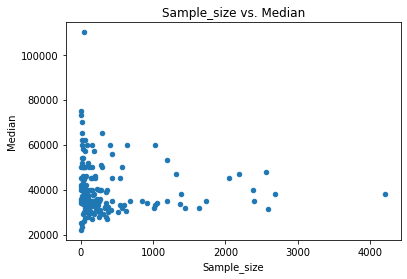

In [7]:
ax1= recent_grads.plot(x="Sample_size", y="Median", kind="scatter")
ax1.set_title('Sample_size vs. Median')

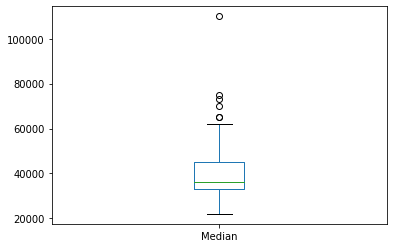

In [35]:
recent_grads.plot(x="Sample_size", y="Median", kind="box")

- Sample_size-フルタイムのサンプルサイズ（重み付けなし）。
- 中央値-フルタイムの通年労働者の給与の中央値。

全体の75％のフルタイムの仕事の給料（中央値）は２０,０００ドルから43,000ドルの間です。
下位25％から７５％までの仕事は30,000ドルから43,000ドルのレンジをとります。

Text(0.5, 1.0, 'Sample_size vs. Unemployment_rate')

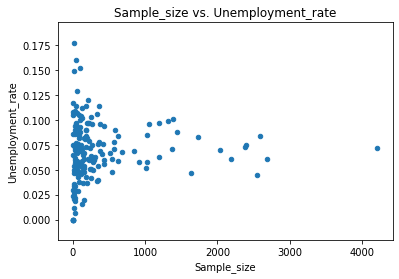

In [8]:
ax2 = recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter" )
ax2.set_title('Sample_size vs. Unemployment_rate')

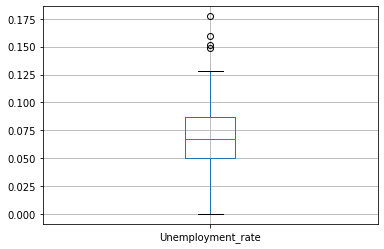

In [52]:
recent_grads.boxplot(column = "Unemployment_rate")

- Sample_size-フルタイムのサンプルサイズ（重み付けなし）
- Unemployment_rate - 失業率

多くの場合、失業率は5％から８％程度です。一部の専攻では８％以上と高い失業率のケースもあります。

Text(0.5, 1.0, 'Full_time vs. Median')

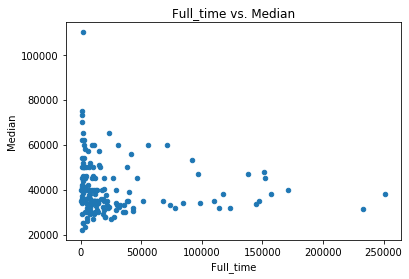

In [9]:
ax3 = recent_grads.plot(x="Full_time", y="Median", kind="scatter" )
ax3.set_title('Full_time vs. Median')

- Full_time - 35時間以上雇用されている数。
- Median - フルタイムの通年労働者の給与の中央値。

35時間以上働いている従業員の多くは大きな金額を稼いでいないようです。

Text(0.5, 1.0, 'ShareWomen vs. Unemployment_rate')

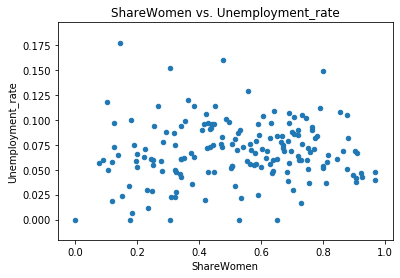

In [10]:
ax4 = recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter" )
ax4.set_title('ShareWomen vs. Unemployment_rate')

- ShareWomen - Women as share of total.
- Unemployment_rate

女性における失業率は２．５％から１２．５％とばらつきがあります。

Text(0.5, 1.0, 'Men vs. Median')

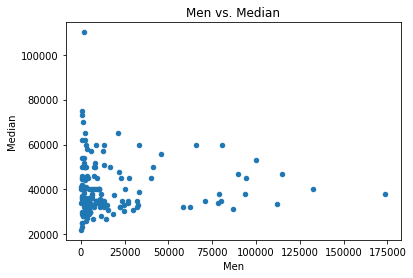

In [11]:
ax5 = recent_grads.plot(x="Men", y="Median", kind="scatter" )
ax5.set_title('Men vs. Median')

- Men - 男性の卒業生
- Median - フルタイムの通年労働者の給与の中央値。

男性の卒業生の多くは30,000~60,000ドルの間で給与を得ることができます。
60,000ドル付近の金額を稼ぐ卒業生の人数は女性の卒業生にくらべ多い。

Text(0.5, 1.0, 'Women vs. Median')

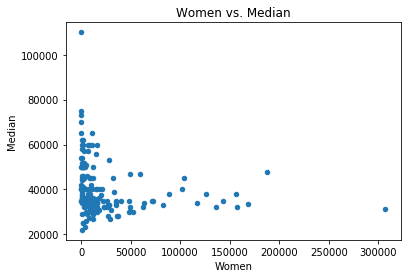

In [12]:
ax_6 = recent_grads.plot(x="Women", y="Median", kind="scatter" )
ax_6.set_title('Women vs. Median')

- Women - 女性の卒業生
- Median - フルタイムの通年労働者の給与の中央値。

女性の卒業生の多くは30000𝑎𝑛𝑑６0000の間で給与を得ることができます。
しかし、女性の卒業生の方が中央値に近い３５,０００ドル程度で働く人の数が男性にくらべ約１．７倍と多い。

Text(0.5, 1.0, 'Total vs. Median')

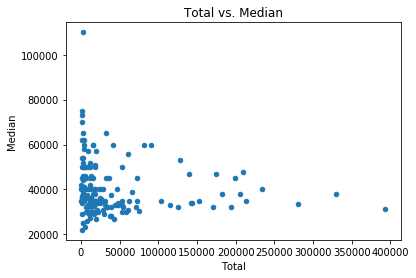

In [13]:
#専攻学生の総数
ax7 = recent_grads.plot(x="Total", y="Median", kind="scatter" )
ax7.set_title('Total vs. Median')

60,000ドル以上稼ぐ卒業生は全体に対し非常のすくない。
これは高い給料を得られる専攻は限定的であることが示唆される。

Text(0.5, 1.0, 'ShareWomen vs. Median')

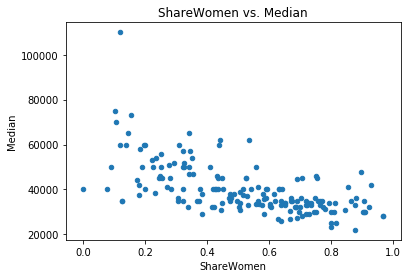

In [14]:
# 大多数が女性である科目を専攻した学生はより多くのお金を稼ぎますか？
ax8 = recent_grads.plot(x="ShareWomen", y="Median", kind="scatter" )
ax8.set_title('ShareWomen vs. Median')

女性の割合が多い専攻ほど得られる賃金は低い傾向にあります。
言い換えると男性の比率が多い専攻では、高い賃金を得られる可能性が高まります。

Text(0.5, 1.0, 'Full_time vs. Median')

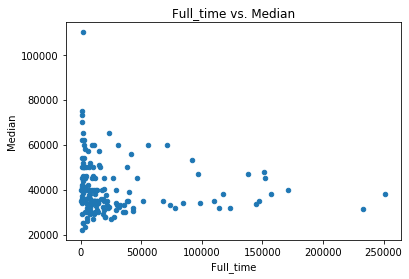

In [15]:
# 正社員の数と給与の中央値との間に関連性はありますか？
ax9 = recent_grads.plot(x="Full_time", y="Median", kind="scatter" )
ax9.set_title('Full_time vs. Median')

多くの正社員は30，０００ドルから40，０００ドルの給与を得ている。
60，０００ドル以上の高い賃金を得る正社員は全体において少数派である。

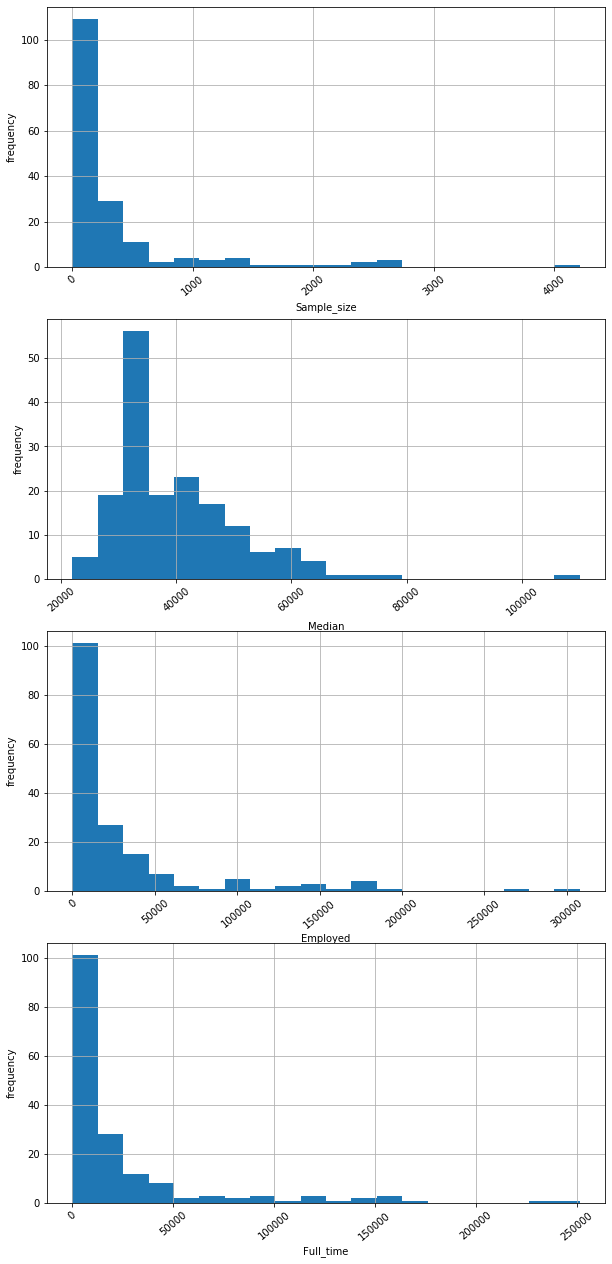

In [24]:
cols = ["Sample_size", "Median", "Employed", "Full_time", 
        "ShareWomen","Unemployment_rate","Men", "Women"]
fig = plt.figure(figsize=(10,22))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    #ax = recent_grads[cols[r-1]].plot(kind='hist', rot=40)
    ax = recent_grads[cols[r-1]].hist(xrot=40, bins=20)
    ax.set_ylabel("frequency")
    ax.set_xlabel(cols[r-1])

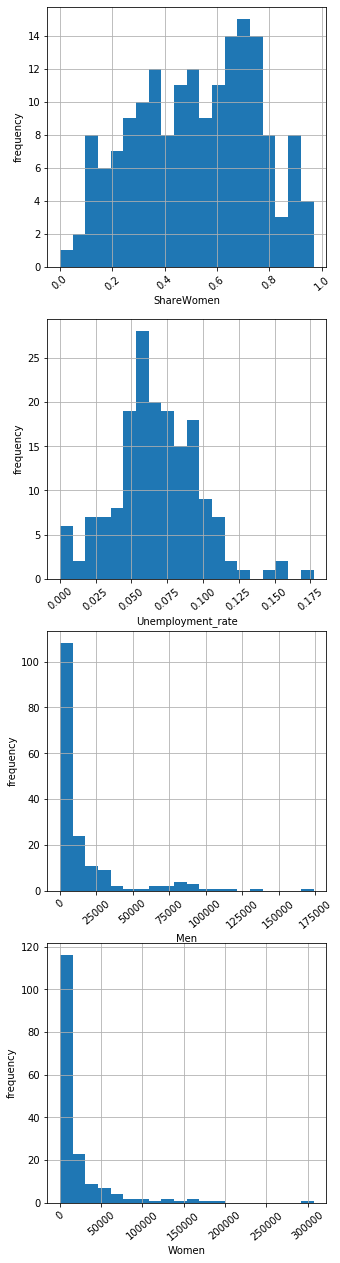

In [17]:
fig = plt.figure(figsize=(5,22))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    #ax = recent_grads[cols[r]].plot(kind='hist',rot=40)
    ax = recent_grads[cols[r]].hist(xrot=40, bins=20)
    ax.set_ylabel("frequency")
    ax.set_xlabel(cols[r])

女性卒業生の場合、一部の専攻から多くの女性が卒業している。
これはShareWomenの棒グラフからも判断できる。
女性が７割ちかく占める専攻は１４個程度存在する。

# What percent of majors are predominantly male? Predominantly female?
# What's the most common median salary range?

In [56]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe641f75ed0>,
      dtype=object)

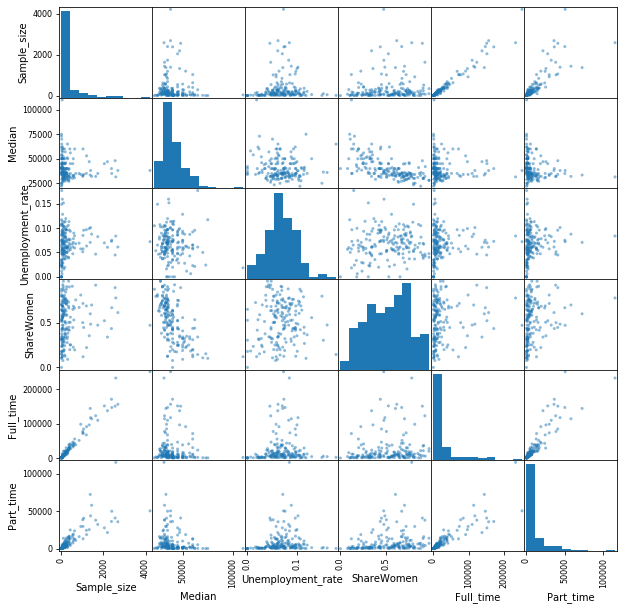

In [58]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate", 'ShareWomen', 'Full_time', 'Part_time']],
              figsize=(10,10))

女性の比率が高い専攻を卒業した場合、フルタイムで働いている人の数は比較的すくない。

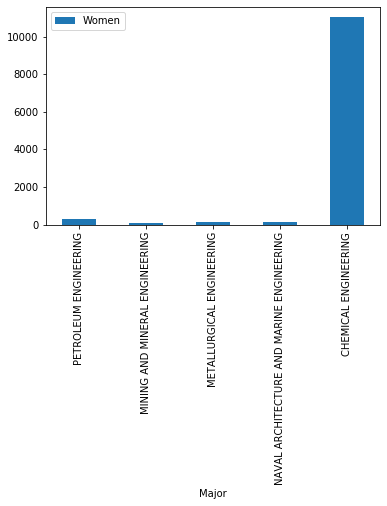

In [20]:
recent_grads[:5].plot.bar(x='Major', y='Women')

In [103]:
popular_majors_women = recent_grads[recent_grads['ShareWomen'] > 0.8]['Major']
index_list = popular_majors_women.index

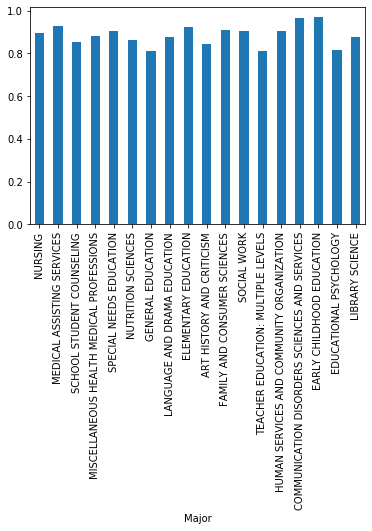

In [104]:
recent_grads.loc[index_list].plot.bar(x="Major", y="ShareWomen",legend= False)
#recent_grads[-10:].plot.bar(x="Major", y="ShareWomen",legend= False)

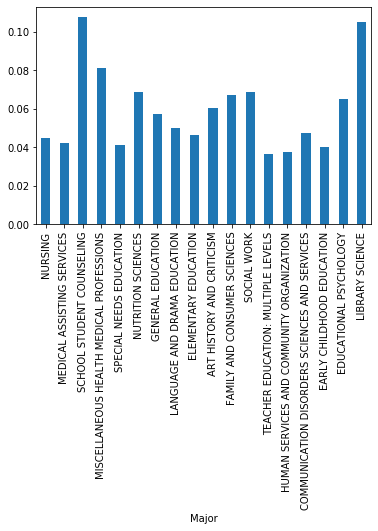

In [89]:
recent_grads.loc[index_list].plot.bar(x="Major", y="Unemployment_rate",legend= False, )
#recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate",legend= False)

女性の割合が8割以上の専攻において特に失業率が高い専攻は、'LIBRARY SCIENCE' & 'SCHOOL STUDENT COUNSELING'です。
さらに失業率が6割以上の専攻は'MISCELLANEOUS HEALTH MEDICAL PROFFESION' & 'NUTRITION SCIENCES' & 'FAMILY AND CONSUMER SCIENCES' & 'SOCIAL WORK' & 'EDUCATIONAL PSHYCHOLOGY'です。
もし失業をさけたいのであれば、上記の専攻以外を学ぶほうが得策です。

In [106]:
unpopular_majors_women = recent_grads[recent_grads['ShareWomen'] <= 0.2]['Major']
index_list_unpopular =unpopular_majors_women.index

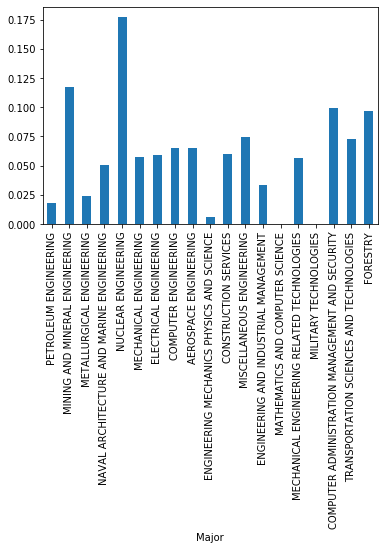

In [107]:
recent_grads.loc[index_list_unpopular].plot.bar(x="Major", y="Unemployment_rate",legend= False, )

In [112]:
high_salary_majors = recent_grads[recent_grads['Median'] > 55000]['Major']
high_salary_major_index = high_salary_majors.index

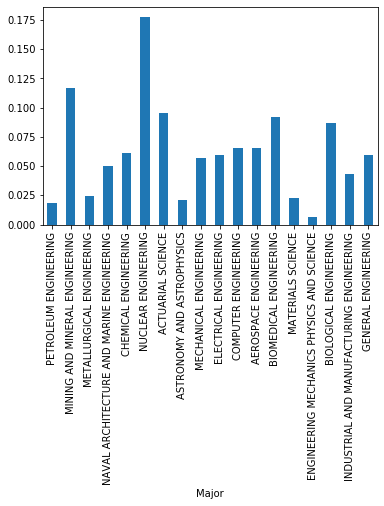

In [113]:
recent_grads.loc[high_salary_major_index].plot.bar(x="Major", y="Unemployment_rate",legend= False, )

55,000ドル以上の高い給与を得られ、失業率の低い専攻は 'ENGINEERING MECHANICS PHYSICS AND SCIENCE' & 'PETRONIUM ENGINEERING'です。
他にも失業率は5％前後で高い給与を得られる専攻は複数あるため、こちらも同様におすすめできる専攻である。